In [74]:
##IMPORTING ALL THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt ##for plotting graphs
import yfinance as yf ##to import the Reliance Industries data
from datetime import datetime,timedelta ##to get the starting and ending dates

## *** CREATING FUNCTION FOR THE TASKS TO CALL AND EXECUTE THEM AT THE END OF THE PROGRAM***

In [75]:
#PART 1 : FETCHING THE DATA
def fetch():
  end=datetime.now()
  start=end-timedelta(days=730)# we needed data for 2 years
  reliance=yf.download('RELIANCE.NS',start,end, auto_adjust=True)
  return reliance

In [76]:
#CALCULATING 50-DAY AND 200-DAY SMA
def calculate_sma(data):
  data['sma_50']=data['close'].rolling(window=50).mean()
  data['sma_200']=data['close'].rolling(window=200).mean()
  return data

In [77]:
#IDENTIFYING GAP UP AND GAP DOWN DAYS
def identify_gaps(data):
  data['prevclose']=data['close'].shift(1)
  data['gapup']=(data['close']>data['prevclose'])
  data['gapdown']=(data['close']<data['prevclose'])
  data['gappct']=(data['open']-data['prevclose'])/data['prevclose']*100


  return data

In [78]:
#VWAP CALCULATION
def calculate_vwap(intraday_data):
  intraday_data['typicalprice']=(intraday_data['high']+intraday_data['low']+intraday_data['close'])/3
  intraday_data['pv']=intraday_data['typicalprice']*intraday_data['volume']
  intraday_data['cum_pv']=intraday_data['pv'].cumsum()
  intraday_data['cum_volume']=intraday_data['volume'].cumsum()

  intraday_data['vwap']=intraday_data['cum_pv']/intraday_data['cum_volume'].cumsum()
  return intraday_data

In [79]:
print("Fetching data for past 2 years RELIANCE")
daily_data=fetch()



Fetching data for past 2 years RELIANCE


[*********************100%***********************]  1 of 1 completed


In [83]:
daily_data.columns = daily_data.columns.get_level_values(1).str.lower()
daily_data=calculate_sma(daily_data)
daily_data=identify_gaps(daily_data)

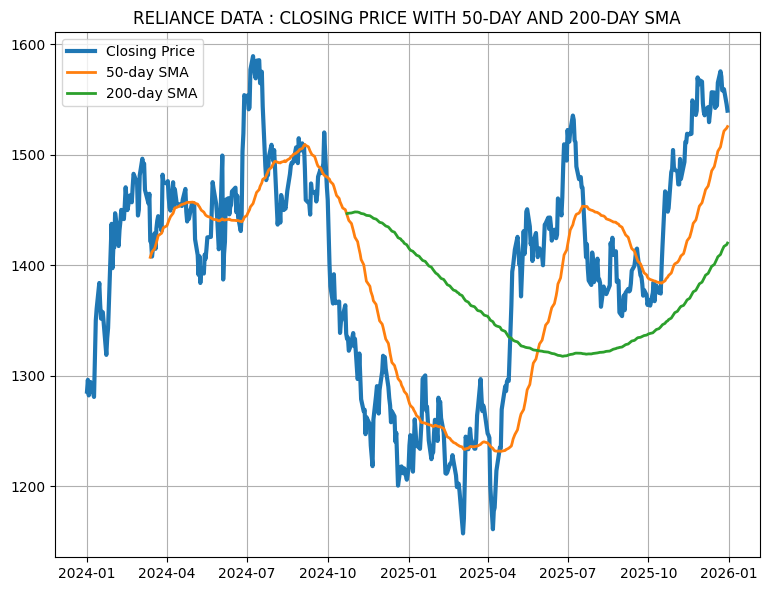

In [84]:
#PLOT 1
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
plt.plot(daily_data.index,daily_data['close'],label='Closing Price',linewidth=3)
plt.plot(daily_data.index,daily_data['sma_50'],label='50-day SMA',linewidth=2)
plt.plot(daily_data.index,daily_data['sma_200'],label='200-day SMA',linewidth=2)
plt.title('RELIANCE DATA : CLOSING PRICE WITH 50-DAY AND 200-DAY SMA')
plt.legend()
plt.grid()

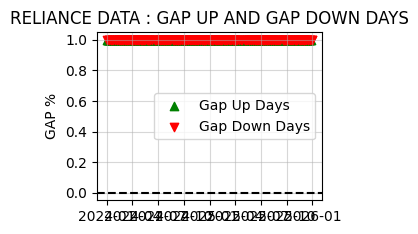

In [85]:
#PLOT 2
plt.subplot(2,2,2)

gap_up_days=daily_data[daily_data['gapup']]
gap_down_days=daily_data[daily_data['gapdown']]
plt.scatter(gap_up_days.index,gap_up_days['gapup'],color='green',label='Gap Up Days',marker='^')
plt.scatter(gap_down_days.index,gap_down_days['gapdown'],color='red',label='Gap Down Days',marker='v')
plt.title('RELIANCE DATA : GAP UP AND GAP DOWN DAYS')

plt.axhline(y=0,color='black',linestyle='--')
plt.ylabel('GAP %')
plt.legend()
plt.grid(True,alpha=0.5)


In [86]:
# Intraday Analysis (Latest trading day)
print("\nFetching intraday data...")
ticker = yf.Ticker('RELIANCE.NS')
intraday_data = ticker.history(period='1d', interval='5m')  # 5-minute intervals
# Convert column names to lowercase to match the calculate_vwap function's expectations
intraday_data.columns = [col.lower() for col in intraday_data.columns]
# Calculate VWAP
intraday_data = calculate_vwap(intraday_data)


Fetching intraday data...



=== Intraday VWAP ===
Final VWAP: ₹60.51
Closing Price vs VWAP: ₹1570.50 (+2495.65%)


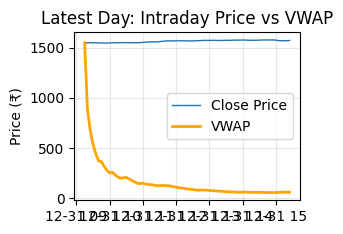

In [87]:
# Plot 3: Intraday Price with VWAP
plt.subplot(2, 2, 3)
plt.plot(intraday_data.index, intraday_data['close'], label='Close Price', linewidth=1)
plt.plot(intraday_data.index, intraday_data['vwap'], label='VWAP', linewidth=2, color='orange')
plt.title('Latest Day: Intraday Price vs VWAP')
plt.ylabel('Price (₹)')
plt.legend()
plt.grid(True, alpha=0.3)

print("\n=== Intraday VWAP ===")
print(f"Final VWAP: ₹{intraday_data['vwap'].iloc[-1]:.2f}")
print(f"Closing Price vs VWAP: ₹{intraday_data['close'].iloc[-1]:.2f} ({((intraday_data['close'].iloc[-1]/intraday_data['vwap'].iloc[-1]-1)*100):+.2f}%)")


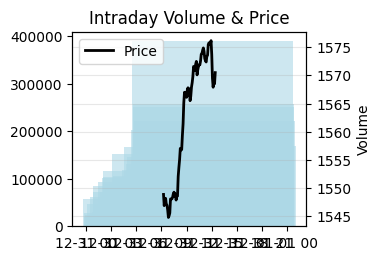

In [88]:
# Plot 4: Volume vs Price (Latest day)
plt.subplot(2, 2, 4)
plt.bar(intraday_data.index, intraday_data['volume'], alpha=0.6, color='lightblue', label='Volume')
plt.twinx()
plt.plot(intraday_data.index, intraday_data['close'], color='black', linewidth=2, label='Price')
plt.title('Intraday Volume & Price')
plt.ylabel('Volume')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [89]:
# Export results to CSV
daily_data.to_csv('reliance_analysis_daily.csv')
if not intraday_data.empty:
    intraday_data.to_csv('reliance_intraday_vwap.csv')

print("\nData exported to:")
print("- reliance_analysis_daily.csv")
print("- reliance_intraday_vwap.csv")


Data exported to:
- reliance_analysis_daily.csv
- reliance_intraday_vwap.csv
